### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.stats
import math
import statistics as stats
import statsmodels.stats.api as sms
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
#to scale the data for PCA
from sklearn.preprocessing import StandardScaler
#to scale the data for the LSTM model
from sklearn.preprocessing import MinMaxScaler
#Importing PCA
from sklearn.decomposition import PCA
#tensorflow
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

### Import Data Source in Pandas Dataframes

In [2]:
# read the SIVB CSV file Locally
# import into the dataframe
sivb_stock_df = pd.read_csv('SIVB.csv')
# confirm the data is imported
sivb_stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-03-17,16.480000,16.910000,16.170000,16.900000,16.900000,213200.0
1,2003-03-18,16.850000,17.280001,16.750000,17.280001,17.280001,263800.0
2,2003-03-19,17.280001,17.340000,17.180000,17.250000,17.250000,198600.0
3,2003-03-20,17.230000,18.940001,17.030001,18.700001,18.700001,1008100.0
4,2003-03-21,18.549999,18.809999,18.280001,18.480000,18.480000,724500.0


In [3]:
# read the SIVB Earings data file Locally
# import into the dataframe
sivb_earnings_df = pd.read_excel('SIVB Financial data.xlsx',sheet_name='Master')
# confirm the data is imported
sivb_earnings_df.head()

,index,Date,Filing,Revenue,Gross Profit,Operating Profit,Net Income,EPS,Shares Out (Millions),Stock Price,...,A,Retained Earnings.1,Total Assets.2,B,EBITDA,C,Market Value,D,E,Z-Score
0,0,2022-12-31,2023-02-24,2246,1528,390,275,5,60,230.14,...,-0.000454,8951,211793,0.042263,457.0,0.002158,13808.4,0.070632,0.010605,0.125203
1,1,2022-09-30,2022-11-07,1880,1557,600,429,7,60,335.78,...,-0.000476,8676,212867,0.040758,655.0,0.003077,15810.0,0.080231,0.008832,0.132421
2,2,2022-06-30,2022-08-08,1636,1529,501,333,6,59,394.99,...,-0.000481,8247,214389,0.038467,551.0,0.002570,16276.0,0.082155,0.007631,0.130343
3,3,2022-03-31,2022-05-06,1639,1599,731,472,8,60,559.45,...,-0.000482,7914,220355,0.035915,781.0,0.003544,16360.0,0.080198,0.007438,0.126613
4,4,2021-12-31,2022-03-01,1536,1500,577,371,6,57,678.24,...,-0.000507,7442,211308,0.035219,622.0,0.002944,16609.0,0.085306,0.007269,0.130231


In [4]:
# import the Federal Reserve data
# skip all rows not needed
fed_funds_effective_rates_df = pd.read_excel('DFF.xls',sheet_name='FRED Graph', skiprows=10)
# confirm the data is imported
fed_funds_effective_rates_df.head()

,observation_date,DFF
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88


In [5]:
# read the US Treasury CSV file Locally
# import into the dataframe
us_treasury_interest_rates_df = pd.read_csv('USTreasury.csv')
# confirm the data is imported
us_treasury_interest_rates_df.head()

,date_of_yield_rate,treasury_1_month_yield_rate,treasury_2_month_yield_rate,treasury_3_month_yield_rate,treasury_6_month_yield_rate,treasury_1_year_yield_rate,treasury_2_year_yield_rate,treasury_3_year_yield_rate,treasury_5_year_yield_rate,treasury_7_year_yield_rate,treasury_10_year_yield_rate,treasury_20_year_yield_rate,treasury_30_year_yield_rate
0,2023-03-10 00:00:00,4.81,4.91,5.01,5.17,4.90,4.60,4.31,3.96,3.86,3.70,3.90,3.70
1,2023-03-09 00:00:00,4.83,4.96,5.05,5.32,5.18,4.90,4.56,4.22,4.10,3.93,4.09,3.88
2,2023-03-08 00:00:00,4.77,4.88,5.06,5.34,5.25,5.05,4.71,4.34,4.19,3.98,4.11,3.88
3,2023-03-07 00:00:00,4.80,4.88,5.04,5.32,5.22,5.00,4.66,4.31,4.17,3.97,4.11,3.88
4,2023-03-06 00:00:00,4.75,4.79,4.93,5.22,5.05,4.89,4.61,4.27,4.16,3.98,4.14,3.92


In [6]:
# read the StockTwits JSON file Locally
# import into the dataframe
stocktwits_df = pd.read_json('SIVB.json')
# confirm the data is imported
stocktwits_df.head()

,id,body,created_at,user,source,symbols,mentioned_users,entities,likes,reshare_message,links,conversation,reshares,owned_symbols
0,518772372,$SIVB \nThe FDIC is seeking bids on Silicon Va...,2023-03-21 02:59:24+00:00,"{'id': 2723993, 'username': 'hsalh100', 'name'...","{'id': 2095, 'title': 'StockTwits For Android ...","[{'id': 3546, 'symbol': 'SIVB', 'symbol_mic': ...",[],{'sentiment': None},NaN,NaN,NaN,NaN,NaN,NaN
1,518771873,$SIVB,2023-03-21 02:53:50+00:00,"{'id': 3836046, 'username': 'MiaButtwreaks', '...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 3546, 'symbol': 'SIVB', 'symbol_mic': ...",[],"{'giphy': {'id': 'LMQ9c65BnD2gzMiJWg', 'ratio'...","{'total': 1, 'user_ids': [2723993]}",NaN,NaN,NaN,NaN,NaN
2,518771654,$SIVB I know and agree 100%.,2023-03-21 02:51:01+00:00,"{'id': 4579829, 'username': 'cjstocksup', 'nam...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 3546, 'symbol': 'SIVB', 'symbol_mic': ...",[],{'sentiment': None},"{'total': 1, 'user_ids': [4579829]}","{'reshared_count': 1, 'reshared_deleted': Fals...",NaN,NaN,NaN,NaN
3,518771024,$SIVB https://www.stockilluminati.com/#watchli...,2023-03-21 02:43:37+00:00,"{'id': 6294398, 'username': 'stockilluminati',...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 3546, 'symbol': 'SIVB', 'symbol_mic': ...",[],{'sentiment': {'basic': 'Bearish'}},NaN,NaN,"[{'title': 'Stockilluminati', 'url': 'https://...",NaN,NaN,NaN
4,518770774,$SPY $DJIA $WFC $SIVB $FRC S&amp;P: Some bank ...,2023-03-21 02:41:18+00:00,"{'id': 689912, 'username': 'AlertsAndNews', 'n...","{'id': 5407, 'title': 'OneUp App', 'url': 'htt...","[{'id': 677, 'symbol': 'DJIA', 'symbol_mic': '...",[],{'sentiment': None},"{'total': 2, 'user_ids': [6142834, 4497978]}",NaN,NaN,NaN,NaN,NaN


## Data Cleaning

#### clean and merge SIVB stock data with quarterly earnings

In [7]:
# rename column
# columns need to be renamed for merge process
# put it in a new data frame
new_sivb_earnings_df = sivb_earnings_df.rename(columns={'Date': 'quarterlyDate', 'Filing': 'Date'})

In [8]:
# change the data types of the columns being joined on
# https://www.roelpeters.be/you-are-trying-to-merge-on-datetime64ns-and-object-columns/
new_sivb_earnings_df['Date'] = new_sivb_earnings_df['Date'].astype('datetime64[ns]')
sivb_stock_df['Date'] = sivb_stock_df['Date'].astype('datetime64[ns]')

In [9]:
# merge the data using a left outer join
# merge 'sivb_stock_df' = left side with 'sivb_earnings_df' = left side
sivb_stock_earnings_df = pd.merge(sivb_stock_df, new_sivb_earnings_df, how="left", on=['Date'])

In [10]:
# add new columns for group by
sivb_stock_earnings_df['DateMonth'] = sivb_stock_earnings_df['Date'].dt.month
sivb_stock_earnings_df['DateYear'] = sivb_stock_earnings_df['Date'].dt.year
sivb_stock_earnings_df['DateQuarter'] = sivb_stock_earnings_df['Date'].dt.quarter

In [11]:
# add new columns to be used by algo
TotalDaysPerMonthPerYear_df = sivb_stock_earnings_df.groupby(['DateYear','DateMonth'],as_index= False).size()
TotalDaysPerQuarterPerYear_df = sivb_stock_earnings_df.groupby(['DateYear','DateQuarter'],as_index= False).size()

In [12]:
# merge both data sets back with the original data set
# merge the data using a left outer join
sivb_stock_earnings_df = pd.merge(sivb_stock_earnings_df, TotalDaysPerMonthPerYear_df, how="left", 
                                  on=['DateYear', 'DateMonth'])

In [13]:
# merge both data sets back with the original data set
# merge the data using a left outer join
sivb_stock_earnings_df = pd.merge(sivb_stock_earnings_df, TotalDaysPerQuarterPerYear_df, how="left", 
                                  on=['DateYear', 'DateQuarter'])

In [14]:
# add new columns for better name convention
sivb_stock_earnings_df['TotalDaysPerMonthPerYear'] = sivb_stock_earnings_df['size_x']
sivb_stock_earnings_df['TotalDaysPerQuarterPerYear'] = sivb_stock_earnings_df['size_y']

In [15]:
# backfill NAN rows
sivb_stock_earnings_df = sivb_stock_earnings_df.fillna(method='bfill')

In [16]:
# forward fill the remaining NAN rows
sivb_stock_earnings_df = sivb_stock_earnings_df.fillna(method='ffill')

In [17]:
# replace volume that is listed as 0
condition  = (sivb_stock_earnings_df['Volume'] == 0 )
sivb_stock_earnings_df.loc[condition, 'Volume'] = 60000000

In [18]:
# boosted revenue times 1 million to reflect real earnings values
# create new calculated column for revenue for higher periodicity
# make sure that all the value that are currently set to NAN are replaced with the number 0 before doing this

sivb_stock_earnings_df['RevenueHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row.Revenue* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)

sivb_stock_earnings_df['GrossProfitHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row['Gross Profit']* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)
sivb_stock_earnings_df['OperatingProfitHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row['Operating Profit']* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)
sivb_stock_earnings_df['NetProfitHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row['Net Income']* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)
sivb_stock_earnings_df['TotalAssetsHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row['Total Assets']* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)
sivb_stock_earnings_df['QuarterlyCashHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row['Quarterly Cash on Hand']* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)
sivb_stock_earnings_df['LongTermDebtHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row['LongTerm Det']* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)
sivb_stock_earnings_df['TotalDebtHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row['Total Det']* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)
sivb_stock_earnings_df['ShareEquityHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row["Shareholder's Equity"]* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)
sivb_stock_earnings_df['RetainedEarningsHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row['Retained Earnings']* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)
sivb_stock_earnings_df['CurrentAssetsHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row['Current Assets (B)']* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)
sivb_stock_earnings_df['CurrentLiabilitiesHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((row['Current Liailities (B)']* 1000000)/row.TotalDaysPerMonthPerYear)/row.TotalDaysPerQuarterPerYear), axis=1)

sivb_stock_earnings_df['SharesOutstanding_in_Millions'] = sivb_stock_earnings_df.apply(
    lambda row: (row['Shares Out (Millions)'] * 1000000), axis = 1)

sivb_stock_earnings_df['EPSHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row.NetProfitHigherPeriodicity/row.SharesOutstanding_in_Millions), axis=1)
sivb_stock_earnings_df['PERatioHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row["Adj Close"]/row.SharesOutstanding_in_Millions), axis=1)
# Market capitlization is calculated with shares outstanding - volume traded for real shares outstanding
sivb_stock_earnings_df['MarketCapitalizationHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row["Adj Close"]*(row.SharesOutstanding_in_Millions - row.Volume)), axis=1)
sivb_stock_earnings_df['PricetoSalesRatioHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row.MarketCapitalizationHigherPeriodicity/row.RevenueHigherPeriodicity), axis=1)
# no info could be gathered on preferred stocks during the alloted time so book value is altered
sivb_stock_earnings_df['BookValuePerShareHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row.ShareEquityHigherPeriodicity-0/row.SharesOutstanding_in_Millions), axis=1)
sivb_stock_earnings_df['PricetoBookRatioHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row.MarketCapitalizationHigherPeriodicity/(row.TotalAssetsHigherPeriodicity - row.TotalDebtHigherPeriodicity)), axis=1)
# no info could be gathered on capital expenditures during the allotted time, 
# so capex was substituted with current liabilities
sivb_stock_earnings_df['FreeCashFlowperShareHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: ((row.OperatingProfitHigherPeriodicity - row.CurrentLiabilitiesHigherPeriodicity)/row.SharesOutstanding_in_Millions), axis=1)
# no info could be gathered on capital expenditures during the allotted time, 
# so capex was substituted with current liabilities
sivb_stock_earnings_df['PricetoFreeCashFlowRatioHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row.MarketCapitalizationHigherPeriodicity/(row.OperatingProfitHigherPeriodicity - row.CurrentLiabilitiesHigherPeriodicity)), axis=1)
sivb_stock_earnings_df['CurrentRatioHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row.CurrentAssetsHigherPeriodicity/row.CurrentLiabilitiesHigherPeriodicity), axis=1)
sivb_stock_earnings_df['DebttoEquityRatioHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row.TotalDebtHigherPeriodicity/(row.TotalAssetsHigherPeriodicity - row.TotalDebtHigherPeriodicity)), axis=1)
sivb_stock_earnings_df['ReturnonEquityHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row.NetProfitHigherPeriodicity/row.ShareEquityHigherPeriodicity), axis=1)
sivb_stock_earnings_df['ReturnonAssetsHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (row.NetProfitHigherPeriodicity/row.TotalAssetsHigherPeriodicity), axis=1)
# Altman Z-Score formula components                                                                                           
sivb_stock_earnings_df['Zscore_A'] = sivb_stock_earnings_df.apply(
lambda row: ((row.CurrentAssetsHigherPeriodicity - row.CurrentLiabilitiesHigherPeriodicity)/row.TotalAssetsHigherPeriodicity), axis=1)
sivb_stock_earnings_df['Zscore_B'] = sivb_stock_earnings_df.apply(
    lambda row: (row.RetainedEarningsHigherPeriodicity/row.TotalAssetsHigherPeriodicity), axis=1)
sivb_stock_earnings_df['Zscore_C'] = sivb_stock_earnings_df.apply(
    lambda row: ((row.GrossProfitHigherPeriodicity - row.CurrentLiabilitiesHigherPeriodicity)/row.TotalAssetsHigherPeriodicity), axis=1)
sivb_stock_earnings_df['Zscore_D'] = sivb_stock_earnings_df.apply(
    lambda row: (row.MarketCapitalizationHigherPeriodicity/row.TotalDebtHigherPeriodicity), axis=1)
sivb_stock_earnings_df['Zscore_E'] = sivb_stock_earnings_df.apply(
    lambda row: (row.RevenueHigherPeriodicity/row.TotalAssetsHigherPeriodicity), axis=1)
                                                                                           
                                                                                           
# no info could be gathered on Operating Expenses for 
# Earnings Before Interest and Taxes (EBIT), so EBIT is altered with current liabilities
# no info could be gathered on Sales, so Sales are altered with Revenue
# used total debt instead instead of total liabilities
# divided by 10 to compensate the total debt being used instead of total liabilities
sivb_stock_earnings_df['AltmanZscoreHigherPeriodicity'] = sivb_stock_earnings_df.apply(
    lambda row: (((1.2*row.Zscore_A) + (1.4*row.Zscore_B) + (3.3*row.Zscore_C) + 
                  (0.6*row.Zscore_D) + (1.0*row.Zscore_E))/10), axis=1)


In [19]:
#Drop Columns with engineered features

sivb_stock_earnings_df=sivb_stock_earnings_df.drop([
'Close',
'quarterlyDate',
'Shares Out (Millions)',
'TTM Net EPS', 'PE Ratio',
'TTM Sales per Share',
'Price to Sales Ratio',
'Book Value per Share',
'Price to Book Ratio',
'TTM FCF per Share',
'Price to FCF Ratio',
'Current Ratio',
'Det to Equity Ratio',
'TTM Net Income',
'Return on Equity',
'Return on Assets',
'Return on Investment',
'Tangile Equity',
'Return on Tangile Equity',
'Working Capital',
'Total Assets.1',
'A',
'Retained Earnings.1',
'Total Assets.2',
'B',
'EBITDA',
'C',
'Market Value',
'D',
'E',
'Z-Score',
'size_x',
'size_y',
'TotalDaysPerMonthPerYear',
'TotalDaysPerQuarterPerYear',
'Zscore_A',
'Zscore_B',
'Zscore_C',
'Zscore_D',
'Zscore_E',
'index',
'Stock Price.1', 
'Stock Price.2',
'Revenue',
'Gross Profit', 'Operating Profit', 'Net Income', 'EPS', 'Stock Price',
'Total Assets', 'Quarterly Cash on Hand', 'LongTerm Det', 'Total Det',
"Shareholder's Equity", 'Retained Earnings', 'Current Assets (B)',
'Current Liailities (B)'
],axis=1)

In [20]:
# define the lambda function to strip out the '_part2' substring from column names
rename_func = lambda col: col.replace('HigherPeriodicity', '_PerDay') if 'HigherPeriodicity' in col else col

# use the rename() method to apply the lambda function to all column names
sivb_stock_earnings_df.rename(columns=rename_func, inplace=True)

#### clean and merge SIVB social media data with previously merged data

In [21]:
#Convert entities column from Dictionary to String
stocktwits_df['entities_str'] = stocktwits_df['entities'].apply(lambda x: str(x))


# Extract strings with None/Bearish/Bullish
stocktwits_df['sentiment'] = stocktwits_df['entities_str'].str.extract('(None|Bearish|Bullish)', expand=False)

In [22]:
#Apply -1/0/1 to columns
stocktwits_df['sentiment_val'] = stocktwits_df['sentiment'].apply(
    lambda x: 1 if 'Bullish' in x else (0 if 'None' in x else -1))

In [23]:
#rename column for better match with merge of main data set
stocktwits_df['date'] = pd.to_datetime(stocktwits_df['created_at']).dt.date

In [24]:
# pivot data
df_pivot = stocktwits_df.pivot_table(index='date', values='sentiment_val', aggfunc='sum')

In [25]:
#reset the index
stocktwits_sentiment_df = df_pivot.reset_index()

In [26]:
# change the data types of the columns being joined on
stocktwits_sentiment_df['Date'] = stocktwits_sentiment_df['date'].astype('datetime64[ns]')

In [27]:
# merge the data back to main data set
sivb_stock_earnings_twits_df = pd.merge(sivb_stock_earnings_df, stocktwits_sentiment_df, how="left", on=['Date'])

In [28]:
# drop column
sivb_stock_earnings_twits_df = sivb_stock_earnings_twits_df.drop(['date'], axis = 1)

#### clean and merge Federal Reserve Fed Funds data with previously merged data

In [29]:
#Merge FRED to Master DF
sivb_stock_earnings_twits_fred_df = pd.merge(sivb_stock_earnings_twits_df, fed_funds_effective_rates_df, 
                                             how="left", left_on=['Date'], right_on=['observation_date'])

In [30]:
# drop column
sivb_stock_earnings_twits_fred_df = sivb_stock_earnings_twits_fred_df.drop(['observation_date'], axis = 1)

#### clean and merge US Treasury data with previously merged data

In [31]:
# change the data types of the columns being joined on
us_treasury_interest_rates_df['Date'] = us_treasury_interest_rates_df['date_of_yield_rate'].astype('datetime64[ns]')

In [32]:
# Merge US Treasury data
sivb_stock_earnings_twits_fred_treasury_df = pd.merge(sivb_stock_earnings_twits_fred_df, us_treasury_interest_rates_df, 
                                                      how="left", left_on=['Date'], right_on=['Date'])
# Drop Columns
sivb_stock_earnings_twits_fred_treasury_df = sivb_stock_earnings_twits_fred_treasury_df.drop(
    columns =['date_of_yield_rate','treasury_2_month_yield_rate','treasury_3_month_yield_rate', 
              'treasury_6_month_yield_rate','treasury_1_year_yield_rate'])

In [33]:
# fill the data for the columns that may have less data from the merges
sivb_stock_earnings_twits_fred_treasury_df = sivb_stock_earnings_twits_fred_treasury_df.ffill()
sivb_stock_earnings_twits_fred_treasury_df = sivb_stock_earnings_twits_fred_treasury_df.bfill()

## Exploratory Data Analysis

In [35]:
# Checking unique values in each column and sorting in descending order
unique_vals = sivb_stock_earnings_twits_fred_treasury_df.nunique().sort_values(ascending=False)

# Printing the results
print(unique_vals)

Date                               5035
AltmanZscore_PerDay                5031
PricetoFreeCashFlowRatio_PerDay    5031
PricetoBookRatio_PerDay            5031
PricetoSalesRatio_PerDay           5031
MarketCapitalization_PerDay        5031
PERatio_PerDay                     4536
Adj Close                          4207
Open                               4144
High                               4136
Low                                4133
Volume                             3706
treasury_20_year_yield_rate         499
treasury_30_year_yield_rate         490
treasury_10_year_yield_rate         463
treasury_7_year_yield_rate          453
treasury_2_year_yield_rate          442
treasury_3_year_yield_rate          441
treasury_5_year_yield_rate          440
DFF                                 414
treasury_1_month_yield_rate         388
TotalAssets_PerDay                  205
Revenue_PerDay                      205
QuarterlyCash_PerDay                205
FreeCashFlowperShare_PerDay         205


In [36]:
# check dataframe info to determine if columns need to be removed during data preprocessing
sivb_stock_earnings_twits_fred_treasury_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5035 entries, 0 to 5034
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             5035 non-null   datetime64[ns]
 1   Open                             5035 non-null   float64       
 2   High                             5035 non-null   float64       
 3   Low                              5035 non-null   float64       
 4   Adj Close                        5035 non-null   float64       
 5   Volume                           5035 non-null   float64       
 6   Numer employees                  5035 non-null   float64       
 7   DateMonth                        5035 non-null   int64         
 8   DateYear                         5035 non-null   int64         
 9   DateQuarter                      5035 non-null   int64         
 10  Revenue_PerDay                   5035 non-null   float64    

In [37]:
# Checking summary statistics
sivb_stock_earnings_twits_fred_treasury_df_1 = sivb_stock_earnings_twits_fred_treasury_df
sivb_stock_earnings_twits_fred_treasury_df =sivb_stock_earnings_twits_fred_treasury_df.round(2)
sivb_stock_earnings_twits_fred_treasury_df_1.describe().T.apply(lambda s: s.apply(lambda x: format(x, 'g')))

,count,mean,std,min,25%,50%,75%,max
Open,5035,143.534,150.591,11.91,46.6,68.08,196.96,761.48
High,5035,145.779,153.085,12.47,47.205,68.4,199.78,763.22
Low,5035,141.185,147.784,11.58,46.04,67.3,193.59,745.47
Adj Close,5035,143.513,150.435,12.04,46.67,68,197.255,755.03
Volume,5035,553199,1.80183e+06,14700,296250,416500,590400,6e+07
Numer employees,5035,2505.21,1932.85,1258,1258,1704,2900,8553
DateMonth,5035,6.54836,3.42602,1,4,7,10,12
DateYear,5035,2012.7,5.78116,2003,2008,2013,2018,2023
DateQuarter,5035,2.5146,1.1144,1,2,3,4,4
Revenue_PerDay,5035,372076,430725,68614.1,81451.6,196023,459016,4.08364e+06


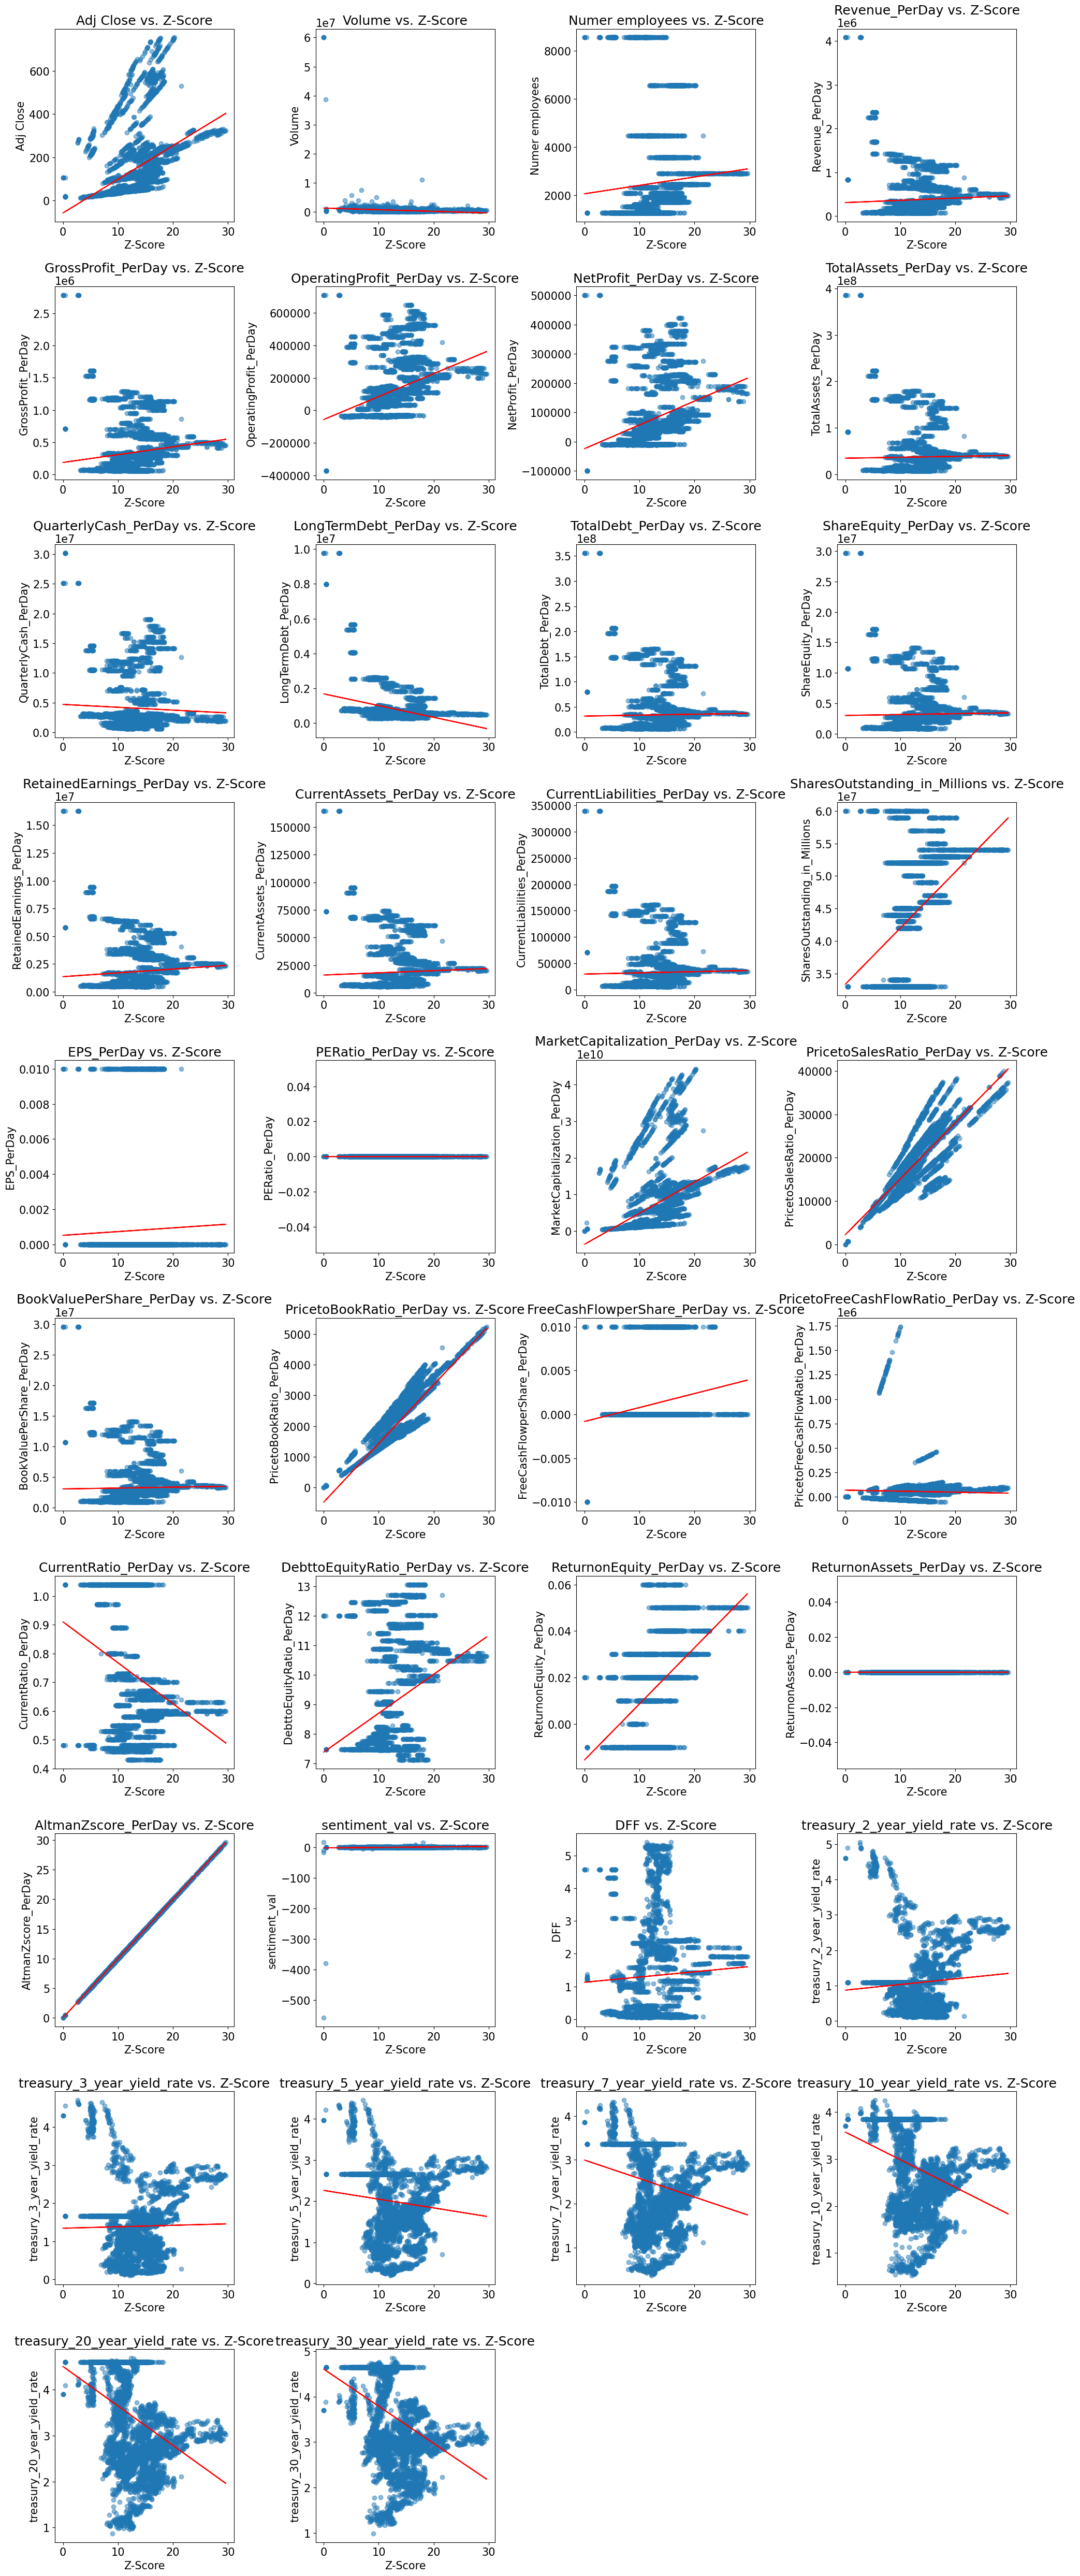

In [38]:
sivb_stock_earnings_twits_fred_treasury_numerical_only_df = sivb_stock_earnings_twits_fred_treasury_df.drop(columns = ['Open','High','Low','DateMonth','DateYear','DateQuarter','treasury_1_month_yield_rate'])

# scatter plot for relevant features
def feature_plots(sivb_stock_earnings_twits_fred_treasury_numerical_only_df, columns, num_cols):
    n_plots = len(columns)
    n_cols = num_cols
    n_rows = int(math.ceil(n_plots/n_cols))
    gs = gridspec.GridSpec(n_rows, n_cols)
    fig = plt.figure(figsize=(20,50))
    plt.rcParams.update({'font.size': 15})
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        y = sivb_stock_earnings_twits_fred_treasury_numerical_only_df[columns[i]]
        x = sivb_stock_earnings_twits_fred_treasury_numerical_only_df['AltmanZscore_PerDay']
        m, b = np.polyfit(x,y,1)
        plt.scatter(x,y,alpha=0.5)
        plt.plot(x, m*x+b, color='red')
        ax.set_ylabel(columns[i])
        ax.set_xlabel('Z-Score')
        ax.set_title('{} vs. Z-Score'.format(columns[i]))
    fig.tight_layout()
    plt.show()

# get all columns except date and pass to the feature_plots function
cols = [col for col in sivb_stock_earnings_twits_fred_treasury_numerical_only_df.columns if col != 'Date']
feature_plots(sivb_stock_earnings_twits_fred_treasury_numerical_only_df, cols, 4)

### Principal Component Analysis

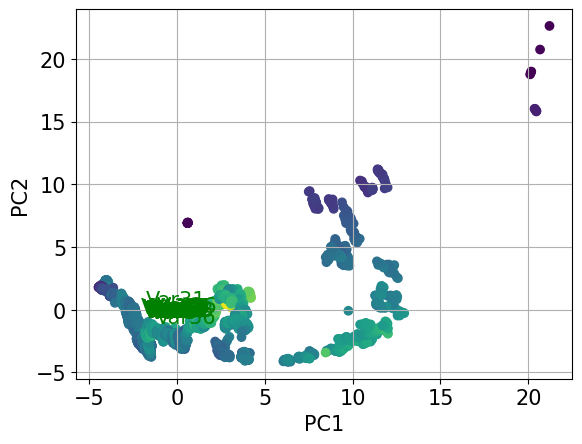

In [39]:
#Create new dataframe without the Date/Time columns and Altman-Zscore
sivb_stock_earnings_twits_fred_treasury_numerical_pca_df = sivb_stock_earnings_twits_fred_treasury_df.drop(columns =['Date', 'DateMonth','DateYear', 'DateQuarter','AltmanZscore_PerDay'])

#Replace NAN with zeros
sivb_stock_earnings_twits_fred_treasury_numerical_pca_df = sivb_stock_earnings_twits_fred_treasury_numerical_pca_df.fillna(0)

#Create new dataframe with only Altman-Zscore
sivb_stock_earnings_twits_fred_treasury_alt_zscore_pca_df = sivb_stock_earnings_twits_fred_treasury_df['AltmanZscore_PerDay']

#Set both data sets as X and y
X = sivb_stock_earnings_twits_fred_treasury_numerical_pca_df
y = sivb_stock_earnings_twits_fred_treasury_alt_zscore_pca_df

#In general it is a good idea to scale the data
X = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)   

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(x_new[:,0:2], pca.components_) 
plt.show()


In [40]:
# how many components?
pca.components_.shape

(41, 41)

In [41]:
# rerun PCA to get The important features are the ones that influence more 
# the components and thus, have a large absolute value on the component.
model = PCA(n_components = pca.components_.shape[0]).fit(X)
X_pc = model.transform(X)

In [42]:
# number of components
n_pcs= model.components_.shape[0]
n_pcs

41

In [43]:
# get the index of the most important feature on EACH component
# using list comprehension
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

In [44]:
initial_feature_names = sivb_stock_earnings_twits_fred_treasury_numerical_pca_df.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [45]:
# using list comprehension
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

In [46]:
# build the dataframe
pcadf = pd.DataFrame(dic.items())
# shows the most influential columns in the dataset per component
# these columns are what I need to look at adding for my feature data set
pcadf

,0,1
0,PC0,GrossProfit_PerDay
1,PC1,treasury_5_year_yield_rate
2,PC2,PricetoSalesRatio_PerDay
3,PC3,treasury_1_month_yield_rate
4,PC4,sentiment_val
5,PC5,PricetoFreeCashFlowRatio_PerDay
6,PC6,FreeCashFlowperShare_PerDay
7,PC7,DFF
8,PC8,sentiment_val
9,PC9,EPS_PerDay


In [47]:
# get the unique values from the dataframe
pcadf[1].unique()

array(['GrossProfit_PerDay', 'treasury_5_year_yield_rate',
       'PricetoSalesRatio_PerDay', 'treasury_1_month_yield_rate',
       'sentiment_val', 'PricetoFreeCashFlowRatio_PerDay',
       'FreeCashFlowperShare_PerDay', 'DFF', 'EPS_PerDay',
       'CurrentRatio_PerDay', 'LongTermDebt_PerDay',
       'DebttoEquityRatio_PerDay', 'Numer employees',
       'QuarterlyCash_PerDay', 'ReturnonEquity_PerDay',
       'OperatingProfit_PerDay', 'SharesOutstanding_in_Millions',
       'NetProfit_PerDay', 'Revenue_PerDay',
       'MarketCapitalization_PerDay', 'treasury_3_year_yield_rate',
       'CurrentAssets_PerDay', 'treasury_20_year_yield_rate', 'Low',
       'treasury_10_year_yield_rate', 'RetainedEarnings_PerDay',
       'treasury_7_year_yield_rate', 'Adj Close',
       'CurrentLiabilities_PerDay', 'TotalAssets_PerDay',
       'BookValuePerShare_PerDay', 'PERatio_PerDay',
       'ReturnonAssets_PerDay'], dtype=object)

## Feature Engineering

### Create Feature and Target data

In [77]:
# create a tensorflow dataframe from the dataset
# add the columns with the most influence from the PCA and add the date and "AltmanZscore_PerDay" column
sivbdfpop = sivb_stock_earnings_twits_fred_treasury_df[['Date','GrossProfit_PerDay', 'treasury_30_year_yield_rate',
                                                        'LongTermDebt_PerDay', 'DFF', 'sentiment_val',
                                                        'PricetoFreeCashFlowRatio_PerDay', 'EPS_PerDay',
                                                        'DebttoEquityRatio_PerDay', 'QuarterlyCash_PerDay',
                                                        'FreeCashFlowperShare_PerDay', 'Revenue_PerDay',
                                                        'treasury_1_month_yield_rate', 'Numer employees',
                                                        'ReturnonEquity_PerDay', 'OperatingProfit_PerDay',
                                                        'SharesOutstanding_in_Millions', 'treasury_2_year_yield_rate',
                                                        'NetProfit_PerDay', 'MarketCapitalization_PerDay',
                                                        'CurrentAssets_PerDay', 'Low', 'treasury_20_year_yield_rate',
                                                        'treasury_10_year_yield_rate', 'treasury_7_year_yield_rate',
                                                        'Adj Close', 'CurrentLiabilities_PerDay', 'TotalAssets_PerDay',
                                                        'BookValuePerShare_PerDay', 'PERatio_PerDay',
                                                        'AltmanZscore_PerDay','ReturnonAssets_PerDay']]



#create datetime to be used as an index for the grouped dataframe
sivbdfpop['Date'] = pd.to_datetime(sivbdfpop['Date'], infer_datetime_format=True)

#set date as index
sivbdfpop = sivbdfpop.set_index(['Date'])

#convert data to proper numeric format
sivbdfpop = sivbdfpop.apply(pd.to_numeric)

#filter the dataframe to include all days less than March 10th, 2023
sivbdfpop = sivbdfpop[:-4]

#print(sivbdfpop.tail())


C:\Users\frank\AppData\Local\Temp\ipykernel_55660\2154880555.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sivbdfpop['Date'] = pd.to_datetime(sivbdfpop['Date'], infer_datetime_format=True)


In [107]:
#create the feature data
featuredata = sivbdfpop
#drop the ['AltmanZscore_PerDay'] column from the data set
#column not needed because it is the target value not determinant value
#featuredata = featuredata.drop(columns=['AltmanZscore_PerDay'])

#create target data
#target data with AltmanZscore_PerDay column
targetdata = pd.DataFrame(data = sivbdfpop['AltmanZscore_PerDay'])
#print(targetdata.tail(1))
#print(featuredata.tail(1))

,GrossProfit_PerDay,treasury_30_year_yield_rate,LongTermDebt_PerDay,DFF,sentiment_val,PricetoFreeCashFlowRatio_PerDay,EPS_PerDay,DebttoEquityRatio_PerDay,QuarterlyCash_PerDay,FreeCashFlowperShare_PerDay,...,treasury_20_year_yield_rate,treasury_10_year_yield_rate,treasury_7_year_yield_rate,Adj Close,CurrentLiabilities_PerDay,TotalAssets_PerDay,BookValuePerShare_PerDay,PERatio_PerDay,AltmanZscore_PerDay,ReturnonAssets_PerDay
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-09,2778181.82,3.88,9763636.36,4.57,-380.0,6096.23,0.01,12.0,25096363.64,0.01,...,4.09,3.93,4.1,106.04,339400.0,3.850782e+08,29627272.73,0.0,0.39,0.0


### Normalize the data

In [108]:
#normalize the data for both feature and target(bka as label)
#use MinMaxScaler to normalize values from '0 to 1'

scaler = MinMaxScaler(feature_range=(0, 1))

featuredata_normalized_0_to_1 = scaler.fit_transform(featuredata)
targetdata_normalized_0_to_1 = scaler.fit_transform(targetdata)

### Build the training set

In [80]:
# build training dataset
# will be percentage of variable sent of the entire dataset
def convert_to_training(X,d):
    get_pct = np.multiply(len(X),d)
    convert_to_whole_number = int(np.round_(get_pct))
    #slice dataset for training dataset
    ds = X[:convert_to_whole_number]
    return ds

In [81]:
#build the training set
#should be 80 percent of the entire data set
#80 percent is the a sequential set based on index (dates)
training_percentage = 0.8
#normalized feature
train_feature = convert_to_training(featuredata_normalized_0_to_1,training_percentage)

##non-normalized feature
#train_feature = convert_to_training(featuredata,training_percentage)

#normalized target
train_target = convert_to_training(targetdata_normalized_0_to_1,training_percentage)

##non-normalized target
#train_target = convert_to_training(targetdata,training_percentage)

#put in numpy array
train_feature = np.nan_to_num(np.array(train_feature))


#define the number of inputs that is expected to be the shape of the input layers
#X train feature, number of rows, number of timesteps, and number of features(columns)
train_feature = np.reshape(train_feature,(train_feature.shape[0],1,train_feature.shape[1]),'C')



#confirm the total number of rows is 80%
print(train_feature.shape)
print(train_target.shape)

(4025, 1, 31)
(4025, 1)


### Build the validation set

In [82]:
# build validation dataset
# will be percentage of variable sent of the entire dataset
def convert_to_validation(X,d):
    get_pct = np.multiply(len(X),d)
    convert_to_whole_number = int(np.round_(get_pct))
    #slice dataset for validation dataset
    ds = X[:convert_to_whole_number]
    return ds

In [83]:
#build validation data set
#10% of the training data set is typically
validation_percentage = 0.1      
validation_feature = convert_to_validation(train_feature,validation_percentage)
validation_target = convert_to_validation(train_target,validation_percentage)
#put in numpy array
validation_feature = np.nan_to_num(np.array(validation_feature))
validation_target = np.nan_to_num(np.array(validation_target))
#define the number of inputs that is expected to be the shape of the input layers
#X train feature, number of rows, number of timesteps, and number of features(columns)
validation_feature = np.reshape(validation_feature,(validation_feature.shape[0],1,validation_feature.shape[2]),'C')

### Build the testing set

In [84]:
def convert_to_test(trainX,wholeX):
    #calculate_what_is_left = int(len(wholeX) - len(trainX))
    row_location_to_start = int(len(trainX))#int(len(trainX)+1)
    #slice dataset for training dataset
    #since times series and data is sequential
    #no need to know the end, just where to start
    ds = wholeX[row_location_to_start:]
    return ds

In [85]:
#build the testing set
#will be whatever is left 
# (since train_feature is on a 3d array now, I have to slice it to get the true value)
# normalized feature data
test_feature = convert_to_test(train_feature,featuredata_normalized_0_to_1)

## non-normalized feature data
#test_feature = convert_to_test(train_feature,featuredata)

#confirm proper shape
#print(test_feature.shape)

#normalized target data
test_target = convert_to_test(train_target,targetdata_normalized_0_to_1)

##non-normalized target data
#test_target = convert_to_test(train_target,targetdata)

#put in numpy array
test_feature = np.nan_to_num(np.array(test_feature))
test_target = np.nan_to_num(np.array(test_target))
test_target_no_normalization = np.nan_to_num(np.array(targetdata[len(train_feature):]))

#define the number of inputs that is expected to be the shape of the input layers
#X train feature, number of rows, number of timesteps, and number of features
test_feature = np.reshape(test_feature,(test_feature.shape[0],1,test_feature.shape[1]),'C')

#confirm the total number of rows
#should be whatever is left
#print(len(test_feature))
#print(len(test_target))
print(test_feature.shape)
print(test_target.shape)

(1006, 1, 31)
(1006, 1)


### Determine the Hyperparameters

In [86]:
#determine hyper parameters to be used by the model
window_length = int(train_feature.shape[1])#90 #for 90 days windows
#data being pulled from 3d array now
train_length = int(train_feature.shape[0])
batch_size = int(len(train_feature[1])) #128 #int(len(train_feature[1])) #include the entire dateset rows in the batch since we use GPU
#train_batch_size_refactored = int(numpy.round(numpy.divide(train_length,batch_size)*0.1)) #refactored for smaller batches
number_of_features = int(train_feature.shape[2]) #multivariate so we include all columns left over at this point
alpha = 2 # range can be from 2 - 10
number_of_neurons = int(np.round(np.divide(train_length,alpha*(window_length+window_length))))
#stepsPerEpoch = int(numpy.round(numpy.divide(train_length,train_batch_size_refactored)*0.75))
#validationStepsPerEpoch = int(numpy.round(numpy.divide(0.1*train_length,train_batch_size_refactored)*0.75))
print(number_of_neurons)

1006


### Delete the temp tables not needed

In [87]:
#now that the train and test datasets are finish
#we can delete the older dataframes to free up memory
#order is set properly
#del test_feature
#del test_target
#del train_target
#del train_feature
del featuredata_normalized_0_to_1
del targetdata_normalized_0_to_1
del featuredata
#"targetdata" dataframe cannot be deleted because used for inverse transformation

## Model Selection

### Model Building

In [88]:
#parameterized tensorflow inputs and outputs
#used for custom metric analysis
# building a functional API model
# model being defined
inputs = tf.keras.Input(shape=(window_length, number_of_features))
#adding LSTM
LSTM_a = tf.compat.v1.keras.layers.LSTM(number_of_neurons, activation='relu', 
                                        recurrent_activation = None, return_sequences = True)(inputs)
#dropout used for regularization
dropout_a = tf.keras.layers.Dropout(0.2)(LSTM_a)
#stacking LSTM models
LSTM_b = tf.compat.v1.keras.layers.LSTM(number_of_neurons, activation='relu',
                                        recurrent_activation = None, return_sequences = True)(dropout_a)

dropout_b = tf.keras.layers.Dropout(0.2)(LSTM_b)

LSTM_c = tf.compat.v1.keras.layers.LSTM(number_of_neurons, activation='relu',
                                        recurrent_activation = None, return_sequences=True)(dropout_b)

dropout_c = tf.keras.layers.Dropout(0.2)(LSTM_c)

LSTM_d = tf.compat.v1.keras.layers.LSTM(number_of_neurons, activation='relu',
                                        recurrent_activation = None, return_sequences=True)(dropout_c)

dropout_d = tf.keras.layers.Dropout(0.2)(LSTM_d)
#partially stacked LSTM model
LSTM_e = tf.compat.v1.keras.layers.LSTM(number_of_neurons, activation='relu',
                                        recurrent_activation = None, return_sequences=False)(dropout_d)

dropout_e = tf.keras.layers.Dropout(0.2)(LSTM_e)

dense_a = tf.keras.layers.Dense(number_of_neurons,activation='relu')(dropout_e)

predicted_outputs = tf.keras.layers.Dense(1,activation='linear')(dense_a)

In [89]:
#define the tensorflow model
model = tf.keras.Model(inputs=inputs, outputs=predicted_outputs)

### Monitor Model Validation Loss

In [90]:
#monitor the model's validation loss
# for Mayar only, use your own file path location on your google drive to host the checkpoint file
callbacks = tf.keras.callbacks.ModelCheckpoint(
    'C:/Users/frank/OneDrive - Big Data and Opensource Consulting LLC/Documents/University_of_San_Diego/Intro_to_AI/AI 501-01-SP23 Final Project/SIVB_CB.ckpt',
    save_best_only=True)

### Assign Model Optimizer

In [91]:
#assign the model's optimizer
#using Adam
tf.keras.optimizers.Adam(learning_rate=0.0001)

### Compile the Model

In [92]:
#compile the model
model.compile(loss=tf.losses.MeanAbsolutePercentageError(),optimizer=tf.optimizers.Adam(),metrics=[tf.losses.MeanAbsolutePercentageError()])

### Model Summary

In [93]:
# display to the model summary to confirm the model is built how you want it built
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 31)]           0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 1006)           4176912   
                                                                 
 dropout_5 (Dropout)         (None, 1, 1006)           0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 1006)           8100312   
                                                                 
 dropout_6 (Dropout)         (None, 1, 1006)           0         
                                                                 
 lstm_7 (LSTM)               (None, 1, 1006)           8100312   
                                                                 
 dropout_7 (Dropout)         (None, 1, 1006)           0   

## Model Fit

In [94]:
#fit everything in the model
#code from the defined model
history = model.fit(train_feature,train_target, epochs=10,validation_data=(validation_feature,validation_target),shuffle=False,callbacks=callbacks, batch_size=batch_size, validation_batch_size=batch_size)

Epoch 1/2
4025/4025 [==============================] - ETA: 0s - loss: 9.0480 - mean_absolute_percentage_error: 9.0480INFO:tensorflow:Assets written to: C:/Users/frank/OneDrive - Big Data and Opensource Consulting LLC/Documents/University_of_San_Diego/Intro_to_AI/AI 501-01-SP23 Final Project\SIVB_CB.ckpt\assets


INFO:tensorflow:Assets written to: C:/Users/frank/OneDrive - Big Data and Opensource Consulting LLC/Documents/University_of_San_Diego/Intro_to_AI/AI 501-01-SP23 Final Project\SIVB_CB.ckpt\assets


4025/4025 [==============================] - 774s 190ms/step - loss: 9.0480 - mean_absolute_percentage_error: 9.0480 - val_loss: 931.0225 - val_mean_absolute_percentage_error: 931.0225
Epoch 2/2
4025/4025 [==============================] - 769s 191ms/step - loss: 67.0590 - mean_absolute_percentage_error: 67.0590 - val_loss: 973.9625 - val_mean_absolute_percentage_error: 973.9625


In [95]:
# view the results of the fitted model
df_history = pd.DataFrame([history])
print(df_history.tail(1))

                                                   0
0  <keras.callbacks.History object at 0x000002489...


In [96]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])


## Model Evaluate

In [97]:
#test with evaluation generator
#code from the defined model
evaluation_score = model.evaluate(test_feature,test_target, batch_size=batch_size, verbose=2)

df_evaluation_score = pd.DataFrame(evaluation_score)

1006/1006 - 23s - loss: 595597.2500 - mean_absolute_percentage_error: 595597.2500 - 23s/epoch - 23ms/step


In [98]:
# view the results of the model evaluation
print(evaluation_score)
print(f'Test loss: {evaluation_score[0]} / Test accuracy: {evaluation_score[1]}')

[595597.25, 595597.25]
Test loss: 595597.25 / Test accuracy: 595597.25


## Model Predict

In [99]:
#run the model with the real data
#code from the defined model
predictions = model.predict(test_feature, batch_size=batch_size)

df_pred = pd.DataFrame(predictions)
#df_pred

1006/1006 [==============================] - 26s 24ms/step


In [100]:
#print(df_pred.tail(1))
print(predictions.shape)

(1006, 1)


In [101]:
##inverse normalization to get predicted whole number for Altman Z-score
predictions = scaler.inverse_transform(predictions)

#view the last 7 records
print(predictions[990:1007])
print(test_target_no_normalization[990:1007])      
#print(tf.keras.backend.int_shape(train_target))
#print(tf.keras.backend.int_shape(predictions))

[[18.45645 ]
 [18.38599 ]
 [18.284657]
 [18.274393]
 [18.273518]
 [18.28485 ]
 [18.272894]
 [18.29361 ]
 [18.30585 ]
 [19.750618]
 [19.719204]
 [19.764036]
 [19.768206]
 [19.621328]
 [19.610628]
 [17.90194 ]]
[[5.51]
 [5.25]
 [5.02]
 [4.96]
 [4.97]
 [5.01]
 [4.9 ]
 [4.96]
 [5.  ]
 [2.86]
 [2.78]
 [2.87]
 [2.85]
 [2.68]
 [2.68]
 [0.39]]


## Model Analysis

In [102]:
# build plot to show target and prediction
# target to compare against--test_target_no_normalization

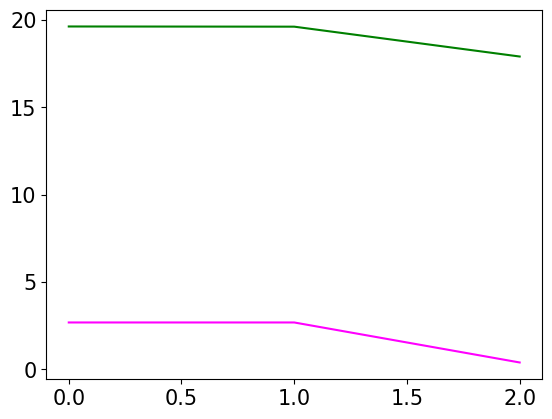

In [103]:
plt.plot(predictions[1003:],color = 'green')
plt.plot(test_target_no_normalization[1003:],'magenta')

In [104]:
predictions[1001:]

array([[19.764036],
       [19.768206],
       [19.621328],
       [19.610628],
       [17.90194 ]], dtype=float32)

In [105]:
test_target_no_normalization[1001:]

array([[2.87],
       [2.85],
       [2.68],
       [2.68],
       [0.39]])